In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv("../Data/stroke_prediction_dataset.csv")
data.dropna(inplace=True)

# Show the first 5 rows of the dataset
display(data.head())

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])


,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels
0,56,1,0,1,1,3,0,130.91,22.37,2,3,2,0,1,5,3.48,1920,4238
1,80,1,0,0,2,3,1,183.73,32.57,2,1,1,0,0,3,1.73,2231,3733
2,26,1,1,1,1,1,0,189.00,20.32,1,2,0,0,1,3,7.31,2621,3324
3,73,1,0,0,1,1,1,185.29,27.50,2,0,2,0,0,3,5.35,3553,4454
4,51,1,1,1,0,3,1,177.34,29.06,0,2,1,0,1,4,6.84,1042,3957


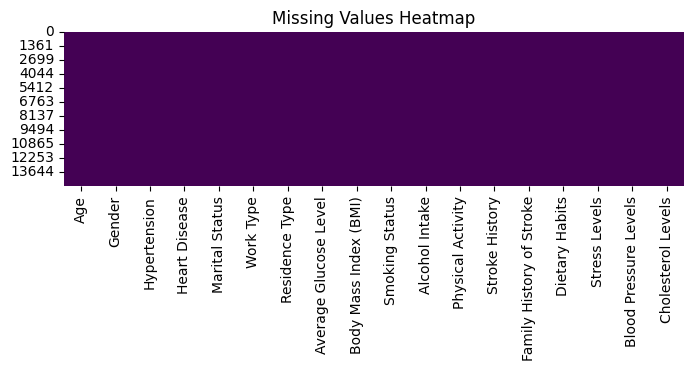

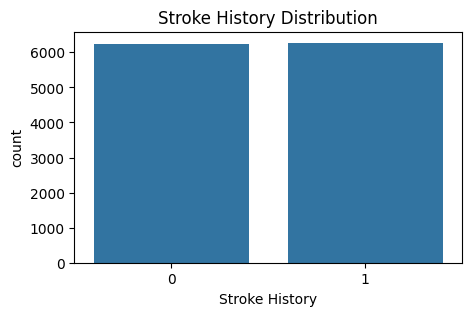

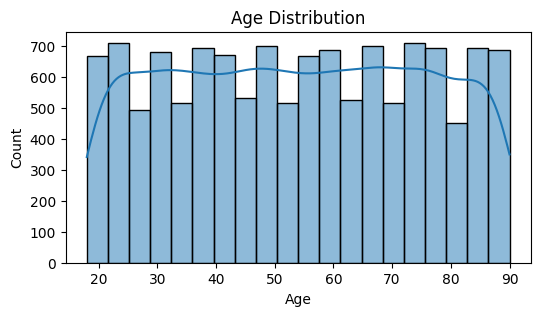

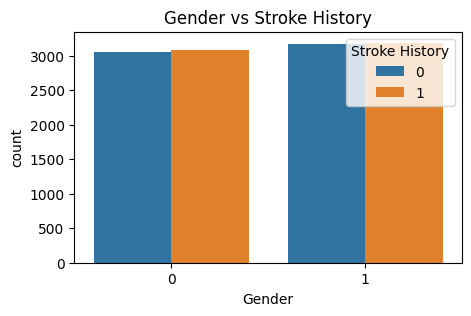

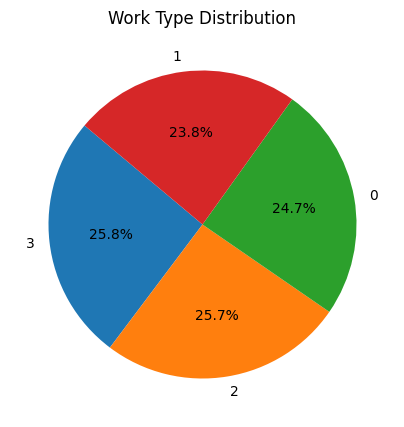

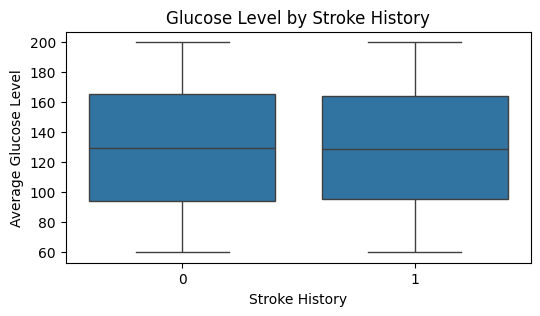

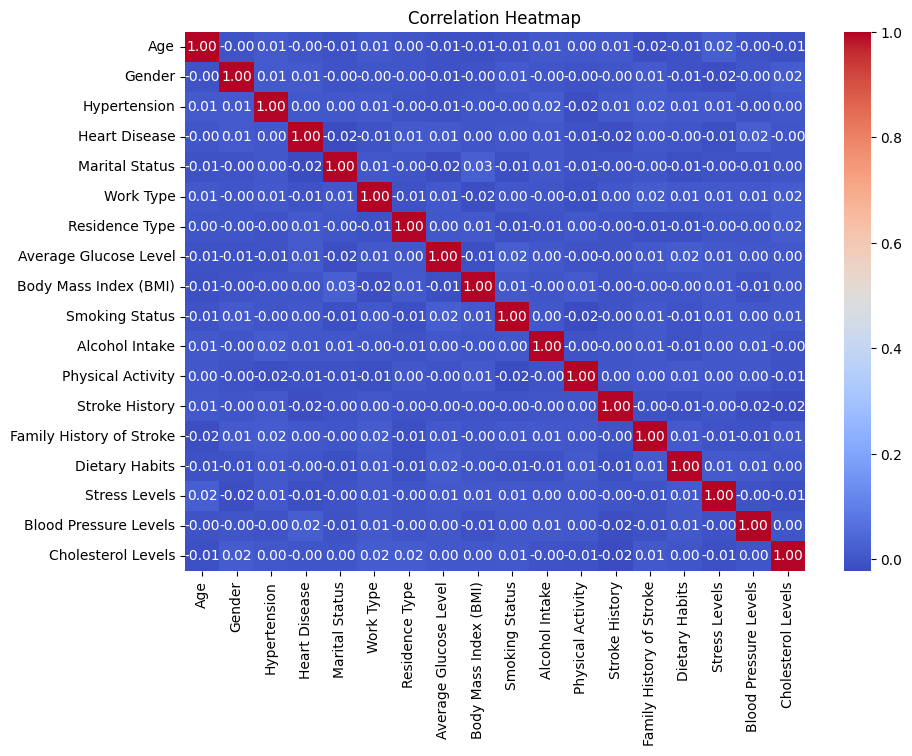

In [10]:
# --- Data Preprocessing: Drop Unnecessary Columns ---
drop_cols = ['Patient ID', 'Patient Name', 'Diagnosis', 'Symptoms']
for col in drop_cols:
    if col in data.columns:
        data = data.drop(col, axis=1)

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# Show the first 5 rows of the cleaned dataset
display(data.head())

# Visualize missing values
plt.figure(figsize=(8, 2))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualize class balance for Stroke History
plt.figure(figsize=(5,3))
sns.countplot(x='Stroke History', data=data)
plt.title('Stroke History Distribution')
plt.show()

# Visualize Age distribution
plt.figure(figsize=(6,3))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

# Visualize Gender vs Stroke History
if 'Gender' in data.columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x='Gender', hue='Stroke History', data=data)
    plt.title('Gender vs Stroke History')
    plt.show()

# Visualize Work Type as pie chart
if 'Work Type' in data.columns:
    plt.figure(figsize=(5,5))
    work_counts = data['Work Type'].value_counts()
    plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Work Type Distribution')
    plt.show()

# Visualize Glucose Level by Stroke History
if 'Average Glucose Level' in data.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Stroke History', y='Average Glucose Level', data=data)
    plt.title('Glucose Level by Stroke History')
    plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Show the first 5 rows of the cleaned dataset
display(data.head())

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels
0,56,1,0,1,1,3,0,130.91,22.37,2,3,2,0,1,5,3.48,1920,4238
1,80,1,0,0,2,3,1,183.73,32.57,2,1,1,0,0,3,1.73,2231,3733
2,26,1,1,1,1,1,0,189.00,20.32,1,2,0,0,1,3,7.31,2621,3324
3,73,1,0,0,1,1,1,185.29,27.50,2,0,2,0,0,3,5.35,3553,4454
4,51,1,1,1,0,3,1,177.34,29.06,0,2,1,0,1,4,6.84,1042,3957


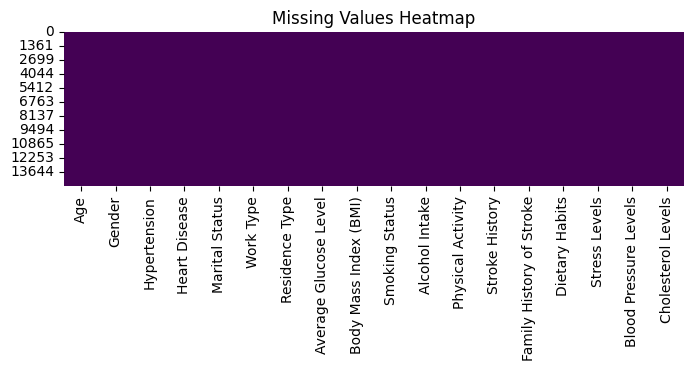

In [12]:
# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 2))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

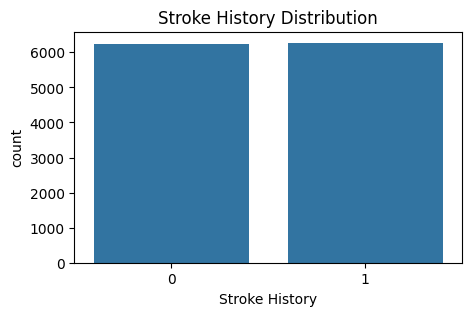

In [13]:
# Visualize class balance for Stroke History
plt.figure(figsize=(5,3))
sns.countplot(x='Stroke History', data=data)
plt.title('Stroke History Distribution')
plt.show()

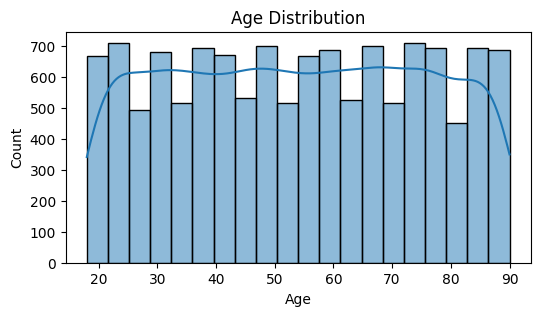

In [14]:
# Visualize Age distribution
plt.figure(figsize=(6,3))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

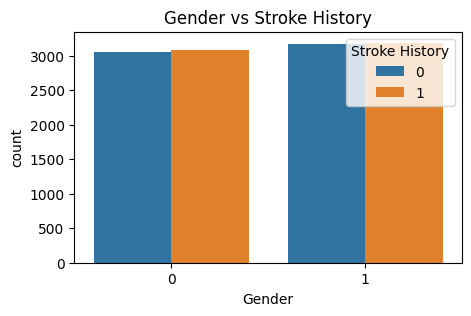

In [15]:
# Visualize Gender vs Stroke History
if 'Gender' in data.columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x='Gender', hue='Stroke History', data=data)
    plt.title('Gender vs Stroke History')
    plt.show()

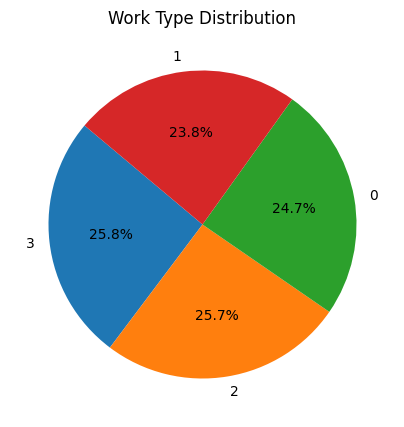

In [16]:
# Visualize Work Type as pie chart
if 'Work Type' in data.columns:
    plt.figure(figsize=(5,5))
    work_counts = data['Work Type'].value_counts()
    plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Work Type Distribution')
    plt.show()

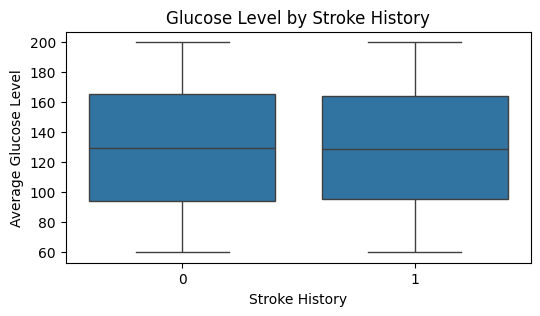

In [17]:
# Visualize Glucose Level by Stroke History
if 'Average Glucose Level' in data.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Stroke History', y='Average Glucose Level', data=data)
    plt.title('Glucose Level by Stroke History')
    plt.show()

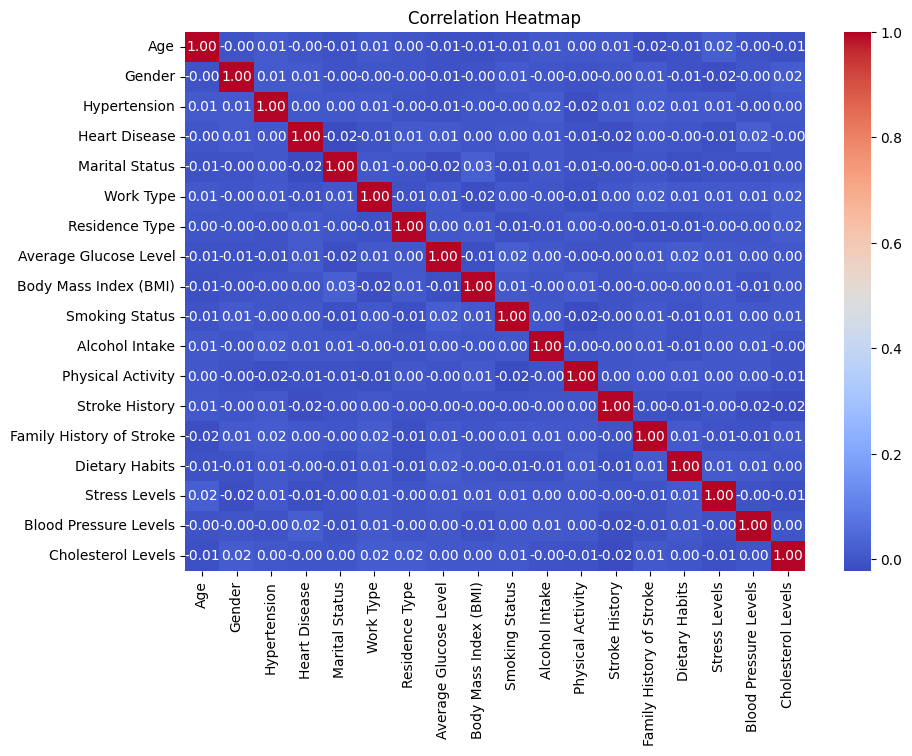

In [18]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Features & Target
# Use the correct column name for the target variable
# The original column is 'Stroke History'

X = data.drop('Stroke History', axis=1)
y = data['Stroke History']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4956

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51      1232
           1       0.50      0.46      0.48      1268

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.50      0.50      0.50      2500



In [20]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get original (non-encoded) data for mapping
orig_data = pd.read_csv("../Data/stroke_prediction_dataset.csv").dropna()
,
,
,
,
display(data.head())
,
2
,
,
,
,
plt.figure(figsize=(5,3))
sns.countplot(x='Stroke History', data=data)
plt.title('Stroke History Distribution')
plt.show()
,
3
,
,
,
,
if 'Gender' in data.columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x='Gender', hue='Stroke History', data=orig_data)
    plt.title('Gender vs Stroke History')
    plt.show()
,
5
,
,
,
,
,
if 'Average Glucose Level' in data.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Stroke History', y='Average Glucose Level', data=orig_data)
    plt.title('Glucose Level by Stroke History')
    plt.show()
,
7
,
.2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Identify categorical columns and their unique values
cat_cols = orig_data.select_dtypes(include='object').columns
cat_options = {col: sorted(orig_data[col].dropna().unique()) for col in cat_cols if col in X.columns}

# Identify binary columns (Yes/No)
binary_cols = []
for col, opts in cat_options.items():
    if set(map(str.lower, opts)) == {'yes', 'no'}:
        binary_cols.append(col)

# GUI for prediction using the trained model and encoded features
def predict():
    try:
        vals = []
        for i, label in enumerate(labels):
            widget = entries[i]
            if isinstance(widget, tk.Entry):
                val = widget.get()
                if val == '':
                    raise ValueError(f"Missing value for {label}")
                vals.append(float(val))
            else:  # OptionMenu
                val = widget.get()
                if val == '':
                    raise ValueError(f"Missing value for {label}")
                # Encode categorical value
                le = LabelEncoder()
                le.fit(orig_data[label])
                vals.append(le.transform([val])[0])
        vals = np.array(vals).reshape(1, -1)
        pred = model.predict(vals)[0]
        result = "⚠️ High Risk of Stroke" if pred == 1 else "✅ Low Risk"
        messagebox.showinfo("Prediction", result)
    except Exception as e:
        messagebox.showerror("Error", f"Please enter valid values.\n{e}")

# Set a single subtle background color (no animation)
def set_bg():
    bg_color = '#f7fafc'  # very light gray
    root.configure(bg=bg_color)
    info_text.configure(bg=bg_color)
    for label_widget in label_widgets:
        label_widget.configure(bg=bg_color)

root = tk.Tk()
root.title("Stroke Predictor")

labels = list(X.columns)
entries = []
label_widgets = []
for i, label in enumerate(labels):
    lbl = tk.Label(root, text=label, bg="#f7fafc")
    lbl.grid(row=i, column=0, sticky='w')
    label_widgets.append(lbl)
    if label in cat_options:
        var = tk.StringVar(root)
        var.set(cat_options[label][0])
        opt = tk.OptionMenu(root, var, *cat_options[label])
        opt.grid(row=i, column=1)
        entries.append(var)
    else:
        entry = tk.Entry(root)
        entry.grid(row=i, column=1)
        entries.append(entry)

info_text = tk.Label(root, text="Enter values for all features. Categorical features have dropdowns.", fg="blue", bg="#f7fafc")
info_text.grid(row=len(labels), column=0, columnspan=2, pady=(10,0))

tk.Button(root, text="Predict", command=predict).grid(row=len(labels)+1, column=0, columnspan=2, pady=10)

set_bg()

root.mainloop()

SyntaxError: invalid decimal literal (2471933311.py, line 50)